# AntennaPod Stats
Visualizing the database from [AntennaPod](https://github.com/AntennaPod/AntennaPod)

## Importing the database as DataFrame

In [2]:
import os
import sqlite3
import pandas as pd

## Note: The code currently assumes that the database file is called "AntennaPodBackup.db" and is one directory above the cloned github folder.
con = sqlite3.connect(os.path.join((os.path.dirname(os.getcwd())),"AntennaPodBackup.db"))
# Read FeedMedia
FeedMedia = pd.read_sql_query("SELECT * from FeedMedia", con)

In [3]:
# convert timestamp in ms to datetime objects (why are they in milliseconds?!)
FeedMedia.last_played_time = pd.to_datetime(FeedMedia.last_played_time, unit='ms')
FeedMedia.playback_completion_date = pd.to_datetime(FeedMedia.playback_completion_date, unit='ms')

In [4]:
# for future analysis it might be useful to have the years, months and days ready
FeedMedia['lpt_year']= FeedMedia['last_played_time'].dt.year
FeedMedia['lpt_month']= FeedMedia['last_played_time'].dt.month
FeedMedia['lpt_day']= FeedMedia['last_played_time'].dt.day

FeedMedia['pcd_year']= FeedMedia['playback_completion_date'].dt.year
FeedMedia['pcd_month']= FeedMedia['playback_completion_date'].dt.month
FeedMedia['pcd_day']= FeedMedia['playback_completion_date'].dt.day

In [5]:
# plot all files with a "last_played_time" greater than 0 (after 1970-01-01)
FeedMedia[FeedMedia["last_played_time"] > "1970-01-01"]

,id,duration,file_url,download_url,downloaded,position,filesize,mime_type,playback_completion_date,feeditem,played_duration,has_embedded_picture,last_played_time,lpt_year,lpt_month,lpt_day,pcd_year,pcd_month,pcd_day
1552,1553,1292830,None,http://podcast-mp3.dradio.de/podcast/2020/02/2...,0,0,20685285,audio/mpeg,2020-02-21 06:43:25.521,1555,1291179.0,0,2020-02-21 06:43:20.618,2020,2,21,2020,2,21
3261,3345,1135048,None,http://podcast-mp3.dradio.de/podcast/2020/02/2...,0,0,18160767,audio/mpeg,2020-02-21 06:21:49.376,3347,1136384.0,0,2020-02-21 06:21:47.829,2020,2,21,2020,2,21
4320,4424,1342952,None,https://media.neuland.br.de/file/31952/c/feed/...,0,1299119,21487104,audio/mpeg,1970-01-01 00:00:00.000,4426,1299119.0,0,2020-02-21 07:05:30.364,2020,2,21,1970,1,1
6431,6535,317467,None,http://podcast-mp3.dradio.de/podcast/2020/02/1...,0,0,5079477,audio/mpeg,2020-02-23 06:31:45.921,6537,316729.0,0,2020-02-23 06:31:44.322,2020,2,23,2020,2,23
8011,8965,2529000,None,https://sphinx.acast.com/cyber/theriseandreign...,0,2503115,60734126,audio/mpeg,2020-02-21 06:02:50.479,8967,2513115.0,0,2020-02-21 06:02:50.279,2020,2,21,2020,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881,39092,3675402,/storage/emulated/0/Android/data/de.danoeh.ant...,https://dts.podtrac.com/redirect.mp3/chtbl.com...,1,2743924,58806526,audio/mpeg,2021-08-30 15:07:24.859,39109,2743925.0,0,2021-08-30 15:07:24.843,2021,8,30,2021,8,30
35882,39093,5696226,None,http://logbuch-netzpolitik.de/podlove/file/823...,0,0,35623685,audio/mp4,2021-08-30 16:46:23.199,39110,5693845.0,0,2021-08-30 16:46:17.765,2021,8,30,2021,8,30
35884,39095,1551934,None,https://dts.podtrac.com/redirect.mp3/chrt.fm/t...,0,0,22488049,audio/mpeg,2021-08-31 07:44:07.402,39112,1471823.0,0,2021-08-31 07:44:03.814,2021,8,31,2021,8,31
35915,39126,1932904,/storage/emulated/0/Android/data/de.danoeh.ant...,https://dts.podtrac.com/redirect.mp3/stitcher....,1,494333,31021907,audio/mpeg,1970-01-01 00:00:00.000,39143,494334.0,1,2021-09-01 17:36:18.158,2021,9,1,1970,1,1


<AxesSubplot:xlabel='lpt_year'>

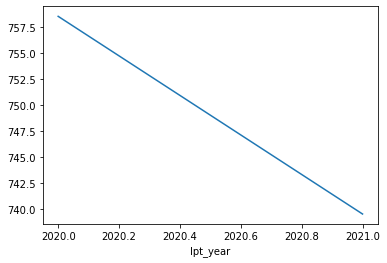

In [11]:
(FeedMedia[FeedMedia["lpt_year"] != 1970].groupby("lpt_year").sum()["played_duration"]/1000/60/60).plot()

# played duration is also in milliseconds